In [21]:
# CELL 1: Import thư viện
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

# Hiển thị đẹp hơn
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)

# Đường dẫn gốc
BASE_DIR = "." 
TRAIN_CSV = os.path.join(BASE_DIR, "train.csv")
TRAIN_IMG_DIR = os.path.join(BASE_DIR, "train_images")


In [22]:
# CELL: Việt hóa tên các loại bệnh

label_map = {
    "bacterial_leaf_blight": "Bệnh bạc lá (vi khuẩn)",
    "bacterial_leaf_streak": "Bệnh sọc lá vi khuẩn",
    "bacterial_panicle_blight": "Bệnh thối bông vi khuẩn",
    "blast": "Bệnh đạo ôn",
    "brown_spot": "Bệnh đốm nâu",
    "dead_heart": "Bệnh chết tim",
    "downy_mildew": "Bệnh sương mai",
    "hispa": "Bệnh sâu hispa",
    "normal": "Lá khỏe mạnh",
    "tungro": "Bệnh vàng lùn (Tungro)"
}

In [23]:
# 1. TẢI DỮ LIỆU

df = pd.read_csv(TRAIN_CSV)
df["label_vi"] = df["label"].map(label_map).fillna(df["label"])

print("Đã tải train.csv với kích thước:", df.shape)
df.head()


Đã tải train.csv với kích thước: (10407, 5)


image_id                  label variety  age                label_vi
0  100330.jpg  bacterial_leaf_blight   ADT45   45  Bệnh bạc lá (vi khuẩn)
1  100365.jpg  bacterial_leaf_blight   ADT45   45  Bệnh bạc lá (vi khuẩn)
2  100382.jpg  bacterial_leaf_blight   ADT45   45  Bệnh bạc lá (vi khuẩn)
3  100632.jpg  bacterial_leaf_blight   ADT45   45  Bệnh bạc lá (vi khuẩn)
4  101918.jpg  bacterial_leaf_blight   ADT45   45  Bệnh bạc lá (vi khuẩn)

In [24]:
# Số lượng giống lúa
num_varieties = df["variety"].nunique()
print("Số lượng giống lúa trong dataset:", num_varieties)

# Bảng số lượng mẫu theo giống lúa
variety_counts = df["variety"].value_counts().reset_index()
variety_counts.columns = ["Giống lúa", "Số lượng mẫu"]

variety_counts


Số lượng giống lúa trong dataset: 10


Giống lúa  Số lượng mẫu
0           ADT45          6992
1  KarnatakaPonni           988
2           Ponni           657
3    AtchayaPonni           461
4           Zonal           399
5      AndraPonni           377
6        Onthanel           351
7            IR20           114
8              RR            36
9           Surya            32

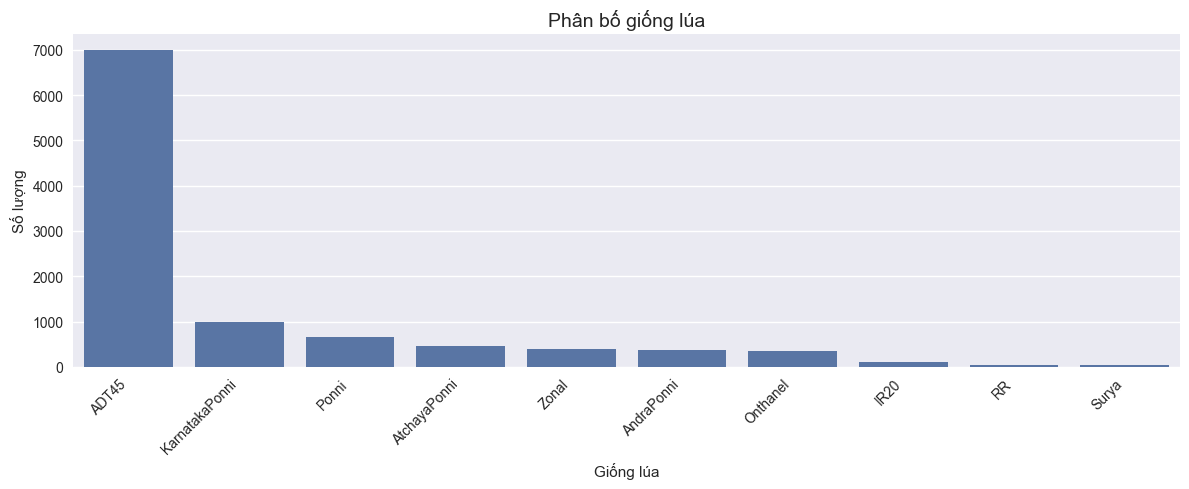

In [25]:
# 3. PHÂN BỐ GIỐNG LÚA

variety_order = df["variety"].value_counts().index

plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="variety", order=variety_order)
plt.title("Phân bố giống lúa", fontsize=14)
plt.xlabel("Giống lúa")
plt.ylabel("Số lượng")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [26]:
# Số lượng loại bệnh
num_diseases_vi = df["label_vi"].nunique()
print("\nSố lượng loại bệnh:", num_diseases_vi)

label_counts = df["label_vi"].value_counts().sort_values(ascending=False)
print(f"\nSố lượng ảnh theo từng loại bệnh: {label_counts}\n")


Số lượng loại bệnh: 10

Số lượng ảnh theo từng loại bệnh: label_vi
Lá khỏe mạnh               1764
Bệnh đạo ôn                1738
Bệnh sâu hispa             1594
Bệnh chết tim              1442
Bệnh vàng lùn (Tungro)     1088
Bệnh đốm nâu                965
Bệnh sương mai              620
Bệnh bạc lá (vi khuẩn)      479
Bệnh sọc lá vi khuẩn        380
Bệnh thối bông vi khuẩn     337
Name: count, dtype: int64



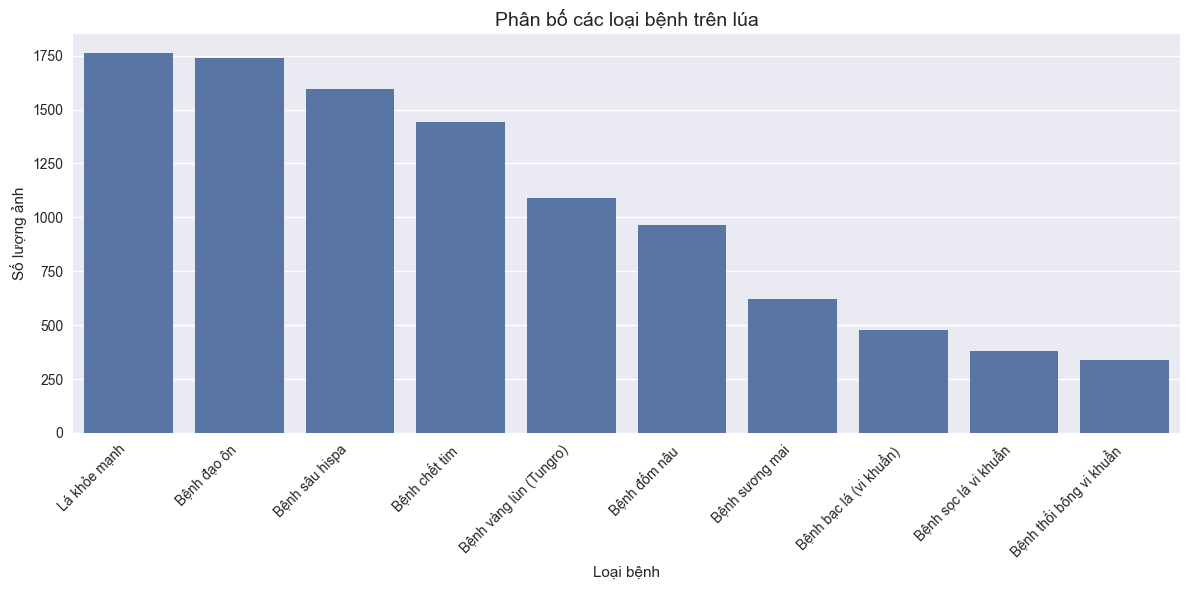

In [27]:
# 2. PHÂN BỐ NHÃN BỆNH (TIẾNG VIỆT)
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Phân bố các loại bệnh trên lúa", fontsize=14)
plt.xlabel("Loại bệnh")
plt.ylabel("Số lượng ảnh")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

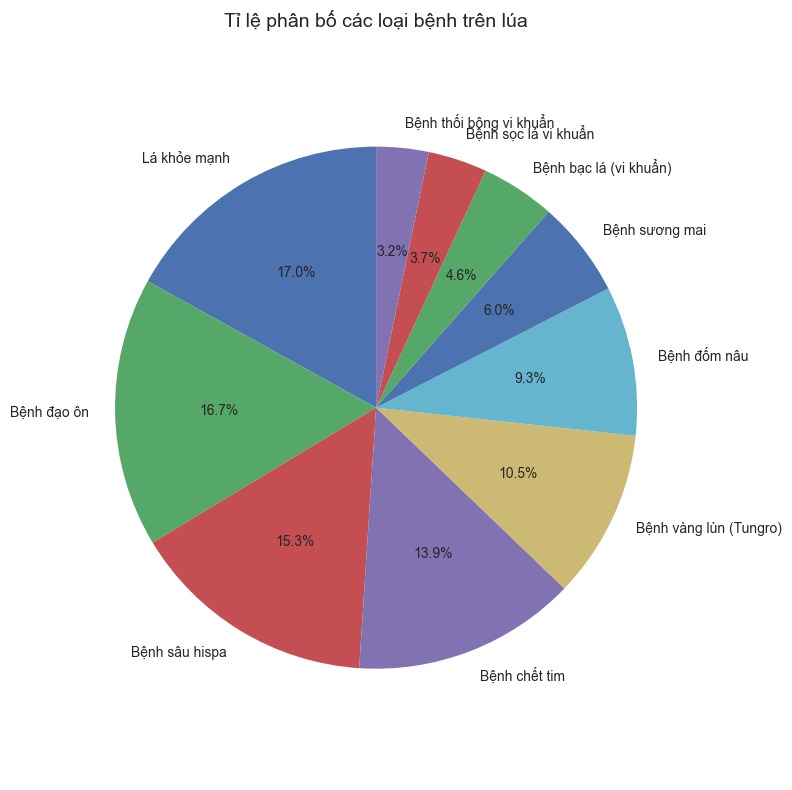

In [28]:
# Biểu đồ tròn - Tỉ lệ các loại bệnh

plt.figure(figsize=(8, 8))
plt.pie(
    label_counts.values,
    labels=label_counts.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Tỉ lệ phân bố các loại bệnh trên lúa", fontsize=14)
plt.axis("equal")  # Hình tròn chuẩn
plt.tight_layout()
plt.show()


In [29]:
# 4. THỐNG KÊ TUỔI LÚA THEO BỆNH
age_by_disease = (
    df.groupby("label_vi")["age"]
    .describe()
    .round(2)
)

age_by_disease


count   mean    std   min   25%   50%   75%   max
label_vi                                                                   
Bệnh bạc lá (vi khuẩn)    479.0  60.81   9.65  45.0  55.0  60.0  72.0  72.0
Bệnh chết tim            1442.0  70.00   6.35  50.0  70.0  70.0  75.0  80.0
Bệnh sâu hispa           1594.0  62.10   7.86  45.0  57.0  65.0  70.0  72.0
Bệnh sương mai            620.0  60.32   9.20  45.0  50.0  60.0  70.0  70.0
Bệnh sọc lá vi khuẩn      380.0  62.99   8.69  50.0  55.0  70.0  70.0  77.0
Bệnh thối bông vi khuẩn   337.0  71.85   4.80  65.0  68.0  70.0  75.0  80.0
Bệnh vàng lùn (Tungro)   1088.0  63.27   8.20  45.0  60.0  65.0  70.0  72.0
Bệnh đạo ôn              1738.0  63.80  11.27  45.0  50.0  70.0  75.0  77.0
Bệnh đốm nâu              965.0  64.98   8.77  45.0  55.0  70.0  70.0  75.0
Lá khỏe mạnh             1764.0  62.06   6.63  50.0  60.0  60.0  67.0  82.0

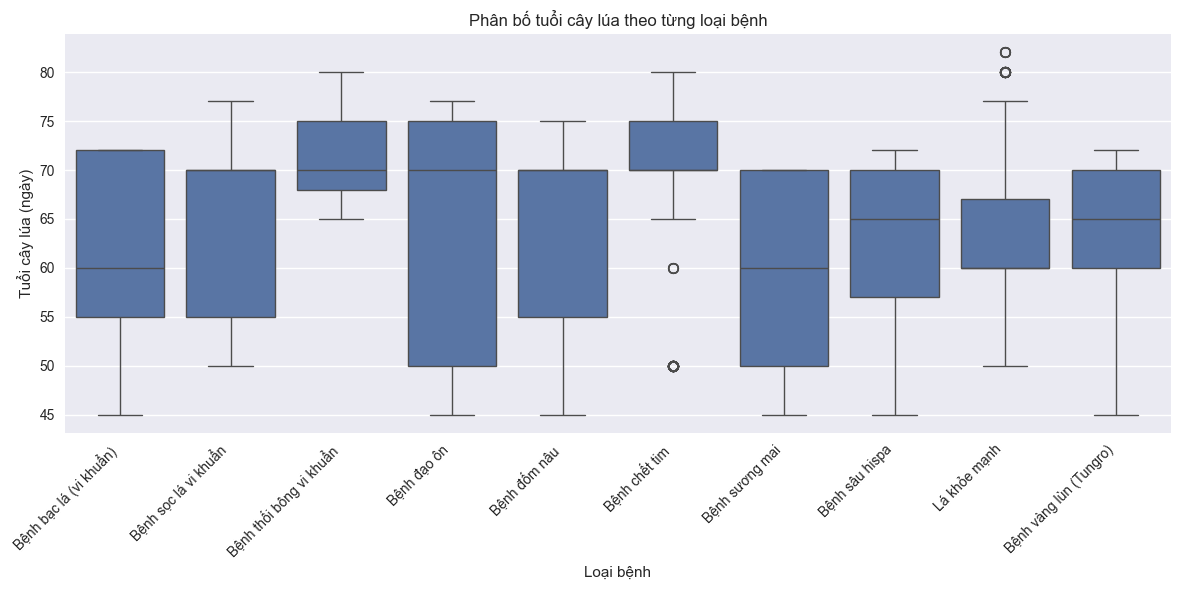

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x="label_vi",  
    y="age"
)
plt.xticks(rotation=45, ha="right")
plt.title("Phân bố tuổi cây lúa theo từng loại bệnh")
plt.xlabel("Loại bệnh")
plt.ylabel("Tuổi cây lúa (ngày)")
plt.tight_layout()
plt.show()


Phân tích thuộc tính ảnh...

Thống kê kích thước ảnh:
Chiều rộng  - Min: 480, Max: 480, Mean: 480.0
Chiều cao - Min: 640, Max: 640, Mean: 640.0
Channels: {3}


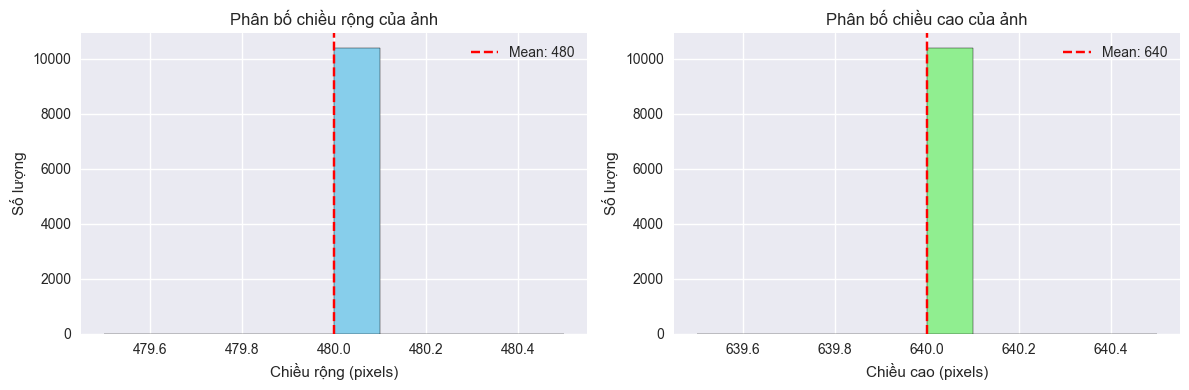

In [31]:
widths = []
heights = []
channels = set()

for label in os.listdir(TRAIN_IMG_DIR):
    label_path = os.path.join(TRAIN_IMG_DIR, label)
    if not os.path.isdir(label_path):
        continue

    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
                channels.add(len(img.getbands()))
        except:
            continue

# ---- In thống kê ----
print("Phân tích thuộc tính ảnh...\n")
print("Thống kê kích thước ảnh:")
print(f"Chiều rộng  - Min: {min(widths)}, Max: {max(widths)}, Mean: {sum(widths)/len(widths):.1f}")
print(f"Chiều cao - Min: {min(heights)}, Max: {max(heights)}, Mean: {sum(heights)/len(heights):.1f}")
print(f"Channels: {channels}")

# ---- Vẽ biểu đồ ----
plt.figure(figsize=(12,4))

# Histogram Width
plt.subplot(1,2,1)
plt.hist(widths, bins=10, color='skyblue', edgecolor='black')
plt.axvline(sum(widths)/len(widths), color='red', linestyle='--', label=f"Mean: {sum(widths)/len(widths):.0f}")
plt.title("Phân bố chiều rộng của ảnh")
plt.xlabel("Chiều rộng (pixels)")
plt.ylabel("Số lượng")
plt.legend()

# Histogram Height
plt.subplot(1,2,2)
plt.hist(heights, bins=10, color='lightgreen', edgecolor='black')
plt.axvline(sum(heights)/len(heights), color='red', linestyle='--', label=f"Mean: {sum(heights)/len(heights):.0f}")
plt.title("Phân bố chiều cao của ảnh")
plt.xlabel("Chiều cao (pixels)")
plt.ylabel("Số lượng")
plt.legend()

plt.tight_layout()
plt.show()

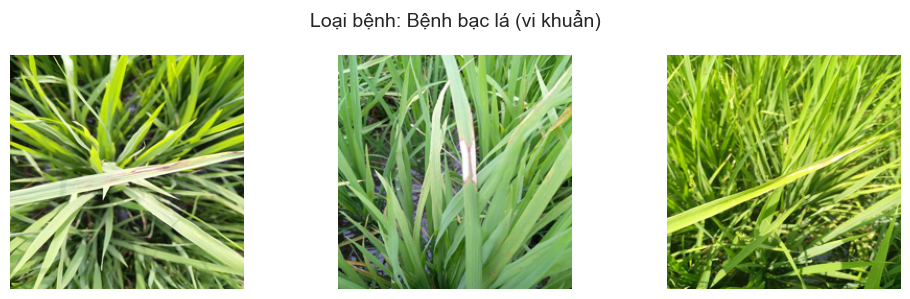

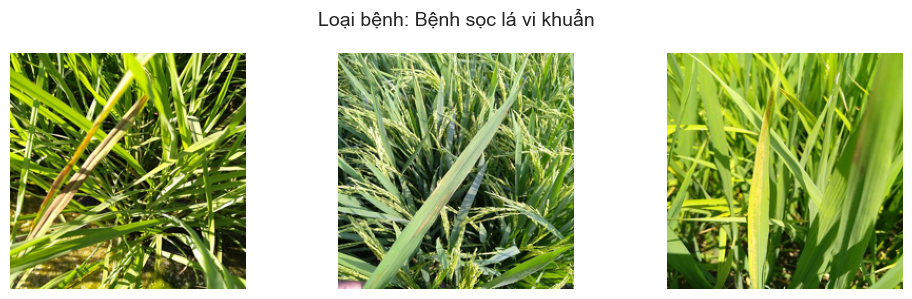

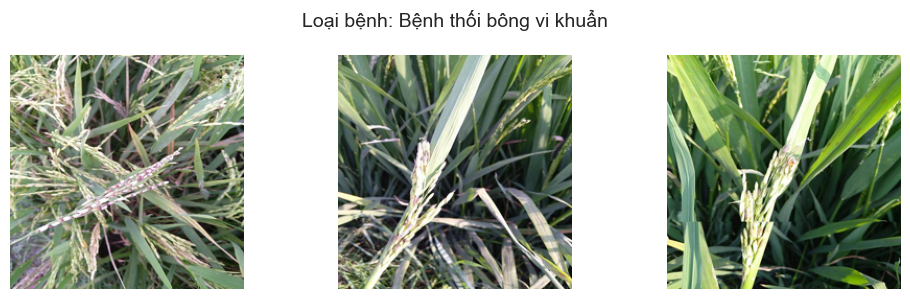

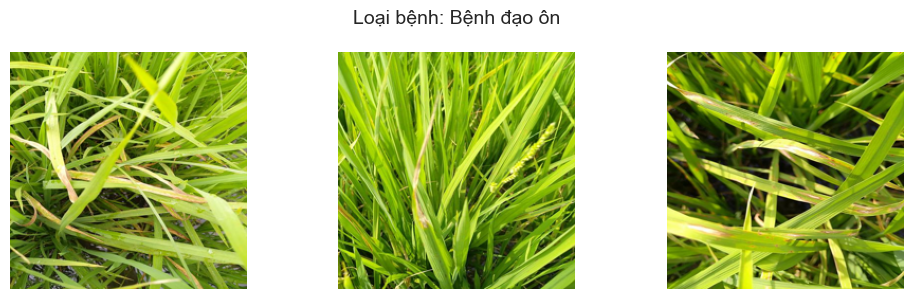

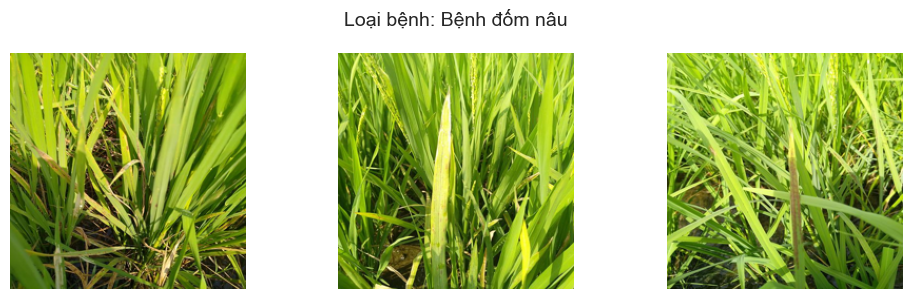

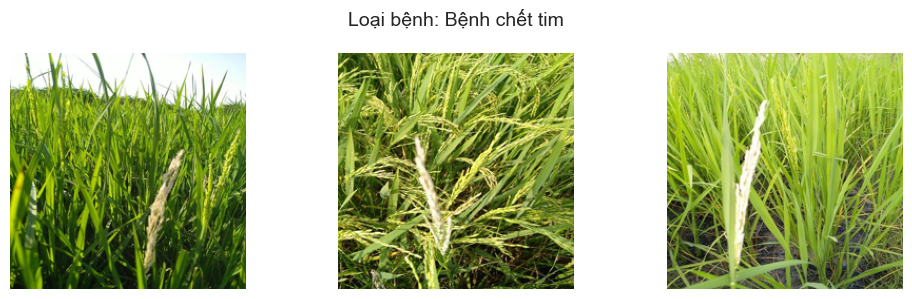

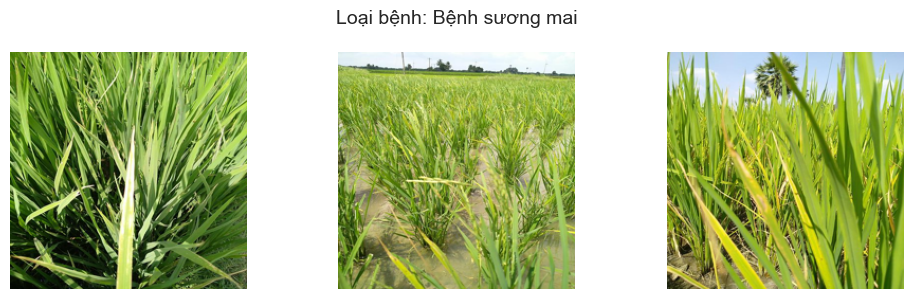

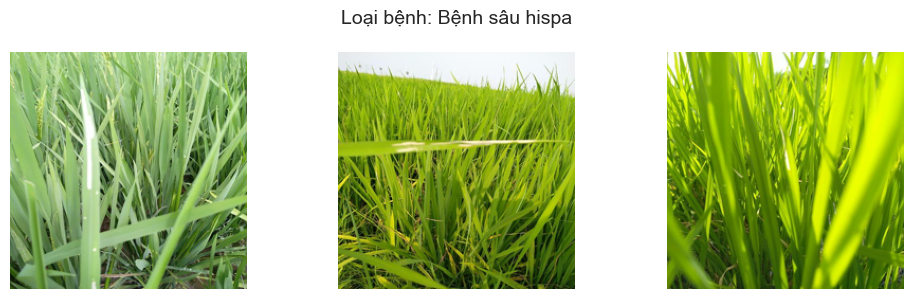

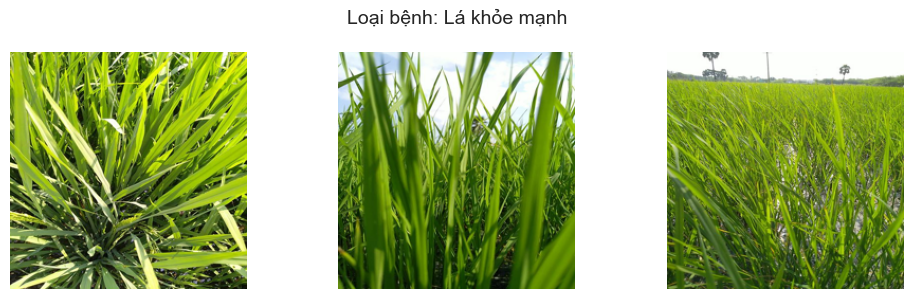

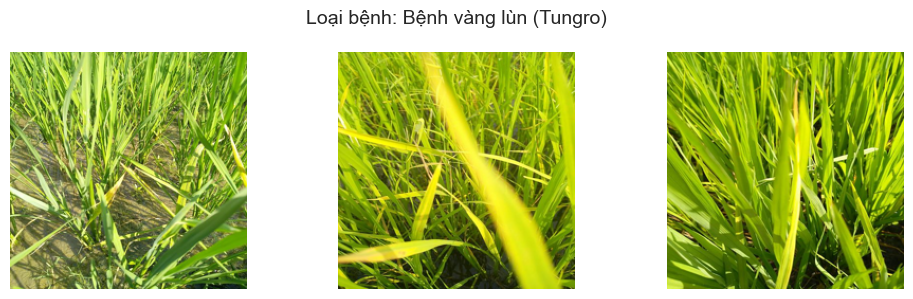

In [32]:
def show_anh_mau_cua_banh(data_dir, label_vi_map, samples_per_class=3, img_size=(224, 224)):
    classes = sorted(os.listdir(data_dir))
    classes = [c for c in classes if os.path.isdir(os.path.join(data_dir, c))]

    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)

        # Lấy tên bệnh tiếng Việt từ train.csv
        label_vi = label_vi_map.get(class_name, class_name)

        # Lấy ngẫu nhiên ảnh
        sample_images = random.sample(images, samples_per_class)

        plt.figure(figsize=(10, 3))
        plt.suptitle(f"Loại bệnh: {label_vi}", fontsize=14)

        for i, img_name in enumerate(sample_images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path).resize(img_size)

            plt.subplot(1, samples_per_class, i + 1)
            plt.imshow(img)
            plt.axis("off")

        plt.tight_layout()
        plt.show()
show_anh_mau_cua_banh(TRAIN_IMG_DIR, label_map, samples_per_class=3, img_size=(224, 224))

Phân tích độ sáng và độ tương phản ảnh...

Độ sáng (Brightness):
Min: 86.31, Max: 195.22, Mean: 132.64

Độ tương phản (Contrast):
Min: 31.35, Max: 76.09, Mean: 56.42



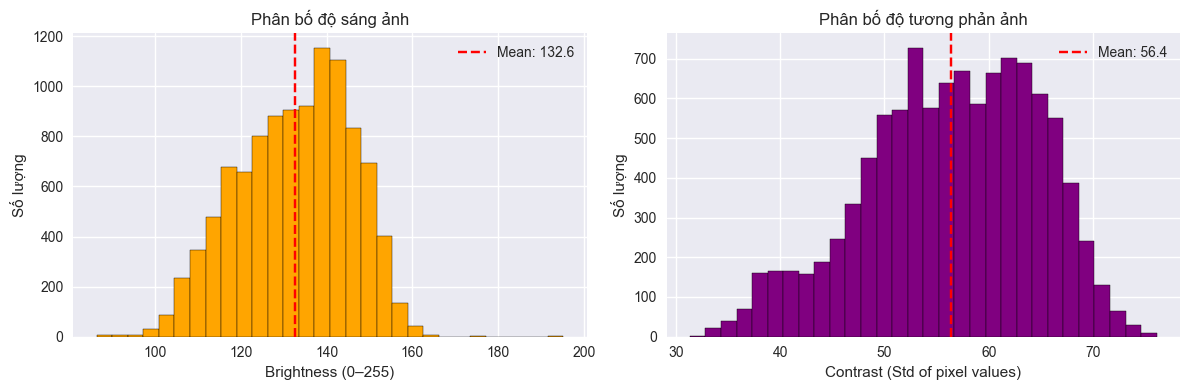

In [33]:

brightness_values = []
contrast_values = []

for label in os.listdir(TRAIN_IMG_DIR):
    label_path = os.path.join(TRAIN_IMG_DIR, label)
    if not os.path.isdir(label_path):
        continue

    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        try:
            # Chuyển ảnh sang grayscale để đo sáng & tương phản
            img = Image.open(img_path).convert("L")
            img_array = np.array(img)

            brightness = img_array.mean()      # Độ sáng
            contrast = img_array.std()         # Độ tương phản

            brightness_values.append(brightness)
            contrast_values.append(contrast)
        except:
            continue

# ---- In thống kê ----
print("Phân tích độ sáng và độ tương phản ảnh...\n")

print("Độ sáng (Brightness):")
print(f"Min: {min(brightness_values):.2f}, "
      f"Max: {max(brightness_values):.2f}, "
      f"Mean: {np.mean(brightness_values):.2f}")

print("\nĐộ tương phản (Contrast):")
print(f"Min: {min(contrast_values):.2f}, "
      f"Max: {max(contrast_values):.2f}, "
      f"Mean: {np.mean(contrast_values):.2f}")
print()

# ---- Vẽ biểu đồ ----
plt.figure(figsize=(12,4))

# Brightness
plt.subplot(1,2,1)
plt.hist(brightness_values, bins=30, color='orange', edgecolor='black')
plt.axvline(np.mean(brightness_values), color='red', linestyle='--',
            label=f"Mean: {np.mean(brightness_values):.1f}")
plt.title("Phân bố độ sáng ảnh")
plt.xlabel("Brightness (0–255)")
plt.ylabel("Số lượng")
plt.legend()

# Contrast
plt.subplot(1,2,2)
plt.hist(contrast_values, bins=30, color='purple', edgecolor='black')
plt.axvline(np.mean(contrast_values), color='red', linestyle='--',
            label=f"Mean: {np.mean(contrast_values):.1f}")
plt.title("Phân bố độ tương phản ảnh")
plt.xlabel("Contrast (Std of pixel values)")
plt.ylabel("Số lượng")
plt.legend()

plt.tight_layout()
plt.show()


# Tiền Xử Lý và Tăng Cường Dữ Liệu

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

# =====================================================
# 1. CẤU HÌNH CHUNG
# =====================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 32  # Giảm xuống 16 nếu GPU yếu

# =====================================================
# 2. TẢI & KIỂM TRA DỮ LIỆU
# =====================================================
df = pd.read_csv(TRAIN_CSV)

# BẮT BUỘC: đảm bảo đã có label_vi
df['label_vi'] = df['label'].map(label_map).fillna(df['label'])
assert 'label_vi' in df.columns, "❌ Chưa tạo cột label_vi"

print("Đã tải train.csv với kích thước:", df.shape)

# =====================================================
# 3. TẠO ĐƯỜNG DẪN ẢNH ĐẦY ĐỦ
# Logic: train_images / tên_thư_mục_bệnh / image_id
# =====================================================
def get_img_path(row):
    return os.path.join(TRAIN_IMG_DIR, row['label'], row['image_id'])

df['image_path'] = df.apply(get_img_path, axis=1)

# =====================================================
# 4. CHIA TRAIN / VALIDATION (THEO label_vi)
# =====================================================
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['label_vi']
)

print(f"Tổng số ảnh: {len(df)}")
print(f"Train set: {len(train_df)} ảnh")
print(f"Validation set: {len(val_df)} ảnh")

# =====================================================
# 5. KHAI BÁO IMAGE DATA GENERATOR
# =====================================================

# Train: Có cường hóa dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation: Chỉ chuẩn hóa
val_datagen = ImageDataGenerator(rescale=1./255)

# =====================================================
# 6. TẠO DATA GENERATOR (DÙNG label_vi)
# =====================================================
print("\n--- Đang khởi tạo luồng dữ liệu ---")

BATCH_SIZE = 32 
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='label_vi',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image_path',
    y_col='label_vi',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# =====================================================
# 7. TÍNH CLASS WEIGHT (MAP ĐÚNG VỚI GENERATOR)
# =====================================================

labels = train_df['label_vi'].values

class_weights_val = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Mapping chính xác label_vi → index của output neuron
class_indices = train_generator.class_indices

class_weights_dict = {
    class_indices[label]: weight
    for label, weight in zip(np.unique(labels), class_weights_val)
}

print(f"\nClass indices (label_vi → index):{class_indices}Ɵ")


print(f"\nClass weights (đã map đúng):{class_weights_dict}Ɵ")

print("\nĐã hoàn tất tiền xử lý & tăng cường dữ liệu!")


Đã tải train.csv với kích thước: (10407, 5)
Tổng số ảnh: 10407
Train set: 8325 ảnh
Validation set: 2082 ảnh

--- Đang khởi tạo luồng dữ liệu ---
Found 8325 validated image filenames belonging to 10 classes.
Found 2082 validated image filenames belonging to 10 classes.

Class indices (label_vi → index):{'Bệnh bạc lá (vi khuẩn)': 0, 'Bệnh chết tim': 1, 'Bệnh sâu hispa': 2, 'Bệnh sương mai': 3, 'Bệnh sọc lá vi khuẩn': 4, 'Bệnh thối bông vi khuẩn': 5, 'Bệnh vàng lùn (Tungro)': 6, 'Bệnh đạo ôn': 7, 'Bệnh đốm nâu': 8, 'Lá khỏe mạnh': 9}Ɵ

Class weights (đã map đúng):{0: np.float64(2.1736292428198434), 1: np.float64(0.7214038128249567), 2: np.float64(0.6529411764705882), 3: np.float64(1.6784274193548387), 4: np.float64(2.7384868421052633), 5: np.float64(3.0833333333333335), 6: np.float64(0.9568965517241379), 7: np.float64(0.5989208633093526), 8: np.float64(1.0783678756476685), 9: np.float64(0.5900070871722183)}Ɵ

Đã hoàn tất tiền xử lý & tăng cường dữ liệu!


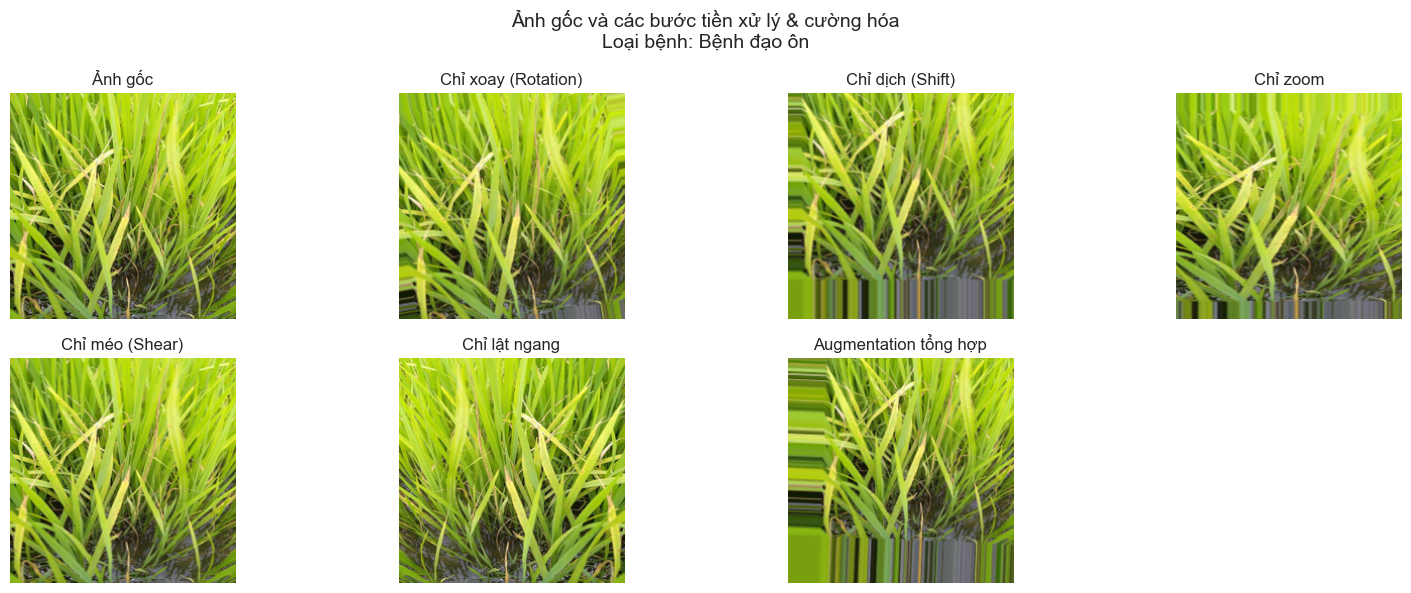

In [35]:
# =====================================================
# Trực quan hóa từng phép tiền xử lý & cường hóa dữ liệu
# =====================================================

# Lấy 1 ảnh mẫu bất kỳ từ tập train
sample_row = train_df.iloc[0]
sample_label_vi = sample_row['label_vi']
sample_img_path = sample_row['image_path']

# Đọc và chuẩn hóa ảnh
img = Image.open(sample_img_path).resize(IMG_SIZE)
img_arr = np.array(img) / 255.0

# -----------------------------------------------------
# Tạo các ImageDataGenerator RIÊNG LẺ cho từng phép
# -----------------------------------------------------
datagen_rotate = ImageDataGenerator(rotation_range=30)
datagen_shift  = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2)
datagen_zoom   = ImageDataGenerator(zoom_range=0.3)
datagen_shear  = ImageDataGenerator(shear_range=0.3)
datagen_flip   = ImageDataGenerator(horizontal_flip=True)

# -----------------------------------------------------
# Áp dụng từng phép biến đổi
# -----------------------------------------------------
img_rotate = datagen_rotate.random_transform(img_arr)
img_shift  = datagen_shift.random_transform(img_arr)
img_zoom   = datagen_zoom.random_transform(img_arr)
img_shear  = datagen_shear.random_transform(img_arr)
img_flip   = datagen_flip.random_transform(img_arr)

# -----------------------------------------------------
# Áp dụng augmentation tổng hợp (giống khi train)
# -----------------------------------------------------
img_full_aug = train_datagen.random_transform(img_arr)

# -----------------------------------------------------
# HIỂN THỊ KẾT QUẢ
# -----------------------------------------------------
plt.figure(figsize=(16, 6))

images = [
    img_arr,
    img_rotate,
    img_shift,
    img_zoom,
    img_shear,
    img_flip,
    img_full_aug
]

titles = [
    "Ảnh gốc",
    "Chỉ xoay (Rotation)",
    "Chỉ dịch (Shift)",
    "Chỉ zoom",
    "Chỉ méo (Shear)",
    "Chỉ lật ngang",
    "Augmentation tổng hợp"
]

for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(im)
    plt.title(title)
    plt.axis("off")

plt.suptitle(
    f"Ảnh gốc và các bước tiền xử lý & cường hóa\nLoại bệnh: {sample_label_vi}",
    fontsize=14
)

plt.tight_layout()
plt.show()


In [36]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB1, preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


In [37]:
# Đường dẫn (giữ như bài của bạn)
TRAIN_CSV = "./train.csv"
TRAIN_IMG_DIR = "./train_images"


df = pd.read_csv(TRAIN_CSV)

# Map label_vi (bắt buộc thống nhất toàn bài)
df["label_vi"] = df["label"].map(label_map).fillna(df["label"])

print("Kích thước dataset:", df.shape)
print("Số lớp:", df["label_vi"].nunique())


Kích thước dataset: (10407, 5)
Số lớp: 10


In [38]:
def get_img_path(row):
    return os.path.join(TRAIN_IMG_DIR, row["label"], row["image_id"])

df["image_path"] = df.apply(get_img_path, axis=1)

assert df["image_path"].apply(os.path.exists).all(), "❌ Có ảnh không tồn tại"
print("✅ Đã kiểm tra đường dẫn ảnh")


✅ Đã kiểm tra đường dẫn ảnh


In [39]:
train_df, val_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label_vi"]
)

print("Train:", len(train_df))
print("Validation:", len(val_df))


Train: 8325
Validation: 2082


In [40]:
IMG_SIZE = (240, 240)
BATCH_SIZE = 8

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="image_path",
    y_col="label_vi",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="image_path",
    y_col="label_vi",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = len(train_generator.class_indices)
print("Số lớp:", NUM_CLASSES)


Found 8325 validated image filenames belonging to 10 classes.
Found 2082 validated image filenames belonging to 10 classes.
Số lớp: 10


In [41]:
labels = train_df["label_vi"].values

weights = class_weight.compute_class_weight(
    class_weight="balanced",
    classes=np.unique(labels),
    y=labels
)

class_weights_dict = {
    train_generator.class_indices[label]: w
    for label, w in zip(np.unique(labels), weights)
}

print("Class weights đã sẵn sàng")


Class weights đã sẵn sàng


In [42]:
base_model = EfficientNetB1(
    weights="imagenet",
    include_top=False,
    input_shape=(240, 240, 3)
)

# MỞ TOÀN BỘ BACKBONE NGAY TỪ ĐẦU
base_model.trainable = True

inputs = layers.Input(shape=(240, 240, 3))
x = base_model(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(512, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = models.Model(inputs, outputs, name="EfficientNetB1_Paddy")

model.summary()


27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "EfficientNetB1_Paddy"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb1 (Functional)     │ (None, 8, 8, 1280)     │     6,575,239 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,243,409 (27.63 MB)

 Trainable params: 7,177,770 (27.38 MB)

 Non-trainable params: 65,639 (256.41 KB)

In [43]:
callbacks = [
    ModelCheckpoint(
        "efnet_b1_best.keras",
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.3,
        patience=5,
        min_lr=1e-7,
        verbose=1
    ),
    EarlyStopping(
        monitor="val_loss",
        patience=12,
        restore_best_weights=True,
        verbose=1
    )
]



In [44]:
from tensorflow.keras.optimizers import Adam

print("🔧 Compile EfficientNetB1 (FULL TRAINING)")

model.compile(
    optimizer=Adam(learning_rate=1e-4),  # LR an toàn cho train full
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


🔧 Compile EfficientNetB1 (FULL TRAINING)


In [45]:
EPOCHS = 100

print("\nBẮT ĐẦU HUẤN LUYỆN EFFICIENTNETB1... \n")

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

print("\nHUẤN LUYỆN HOÀN TẤT")



BẮT ĐẦU HUẤN LUYỆN EFFICIENTNETB1... 

Epoch 1/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.2299 - loss: 2.9006
Epoch 1: val_loss improved from None to 1.15681, saving model to efnet_b1_best.keras
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 578s 528ms/step - accuracy: 0.3277 - loss: 2.3607 - val_accuracy: 0.6422 - val_loss: 1.1568 - learning_rate: 1.0000e-04
Epoch 2/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.5238 - loss: 1.5610
Epoch 2: val_loss improved from 1.15681 to 0.81620, saving model to efnet_b1_best.keras
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 699s 671ms/step - accuracy: 0.5479 - loss: 1.4663 - val_accuracy: 0.7450 - val_loss: 0.8162 - learning_rate: 1.0000e-04
Epoch 3/100
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.6209 - loss: 1.1766
Epoch 3: val_loss improved from 0.81620 to 0.63363, saving model to efnet_b1_best.keras
1041/1041 ━━━━━━━━━━━━━━━━━━━━ 691s 663ms/step - accuracy: 0.6476 - loss: 1.0879 - val_accuracy: 0.8079 - val_loss: 0.6336 -

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model("efnet_b1_best.keras")
print(" Đã load model tốt nhất")


 Đã load model tốt nhất


In [50]:
train_acc = history.history['accuracy'][-1] * 100
val_acc   = history.history['val_accuracy'][-1] * 100

print(f"Train Accuracy  : {train_acc:.2f}%")
print(f"Val Accuracy    : {val_acc:.2f}%")


Train Accuracy  : 98.19%
Val Accuracy    : 97.65%
